In [193]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from ISLP import load_data
from ISLP.models import (summarize, poly, ModelSpec as MS)
from matplotlib.pyplot import subplots

Wage = load_data('Wage')
y = Wage['wage']
age = Wage['age']

age_grid = np.linspace(age.min(), age.max(), 100)
age_df = pd.DataFrame({'age': age_grid})

First computational visit.

Scatter plot.

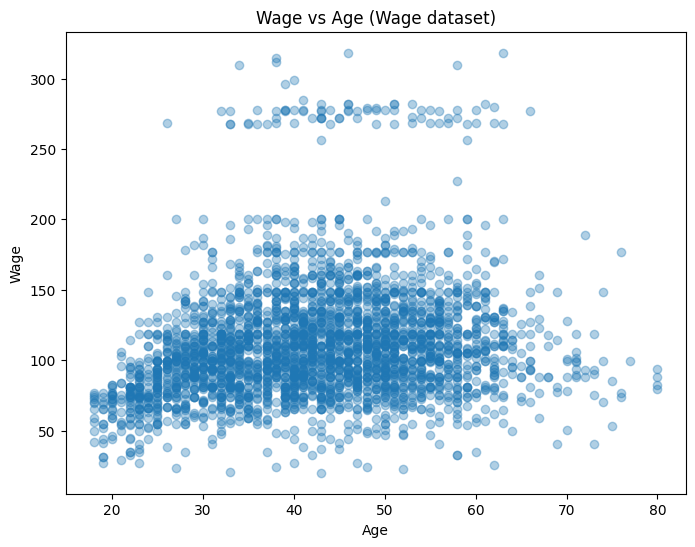

In [194]:
plt.figure(figsize=(8, 6))
plt.scatter(age, y, alpha=0.35)
plt.xlabel("Age")
plt.ylabel("Wage")
plt.title("Wage vs Age (Wage dataset)")
plt.show()

Step 2. Let's build our linear model.

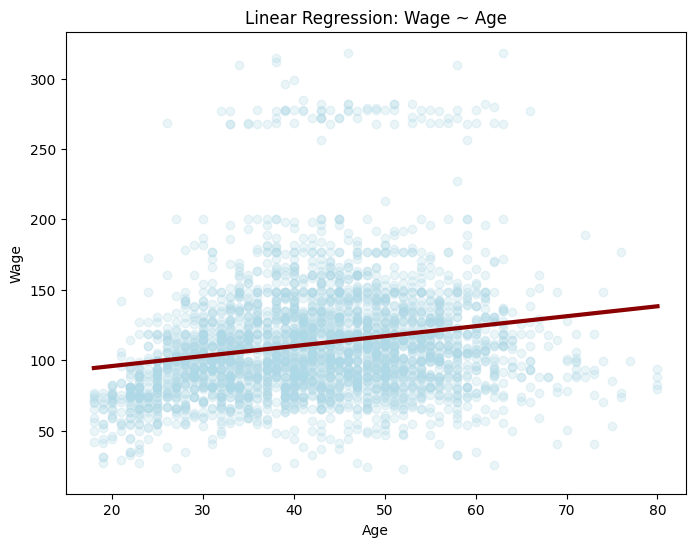

In [195]:
X = sm.add_constant(Wage[['age']])   # matrix with intercept
lm = sm.OLS(y, X).fit() # least squares

# new grid
X_new = sm.add_constant(pd.DataFrame({'age': age_grid}))

# least squares on new grid 
y_hat = lm.predict(X_new)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(age, y, alpha=0.25, color = 'lightblue')
plt.plot(age_grid, y_hat, linewidth=3, color ='darkred')
plt.xlabel("Age")
plt.ylabel("Wage")
plt.title("Linear Regression: Wage ~ Age")
plt.show()

This certainly looks linear. How bad are we doing here? 

Let's compute some residuals. 

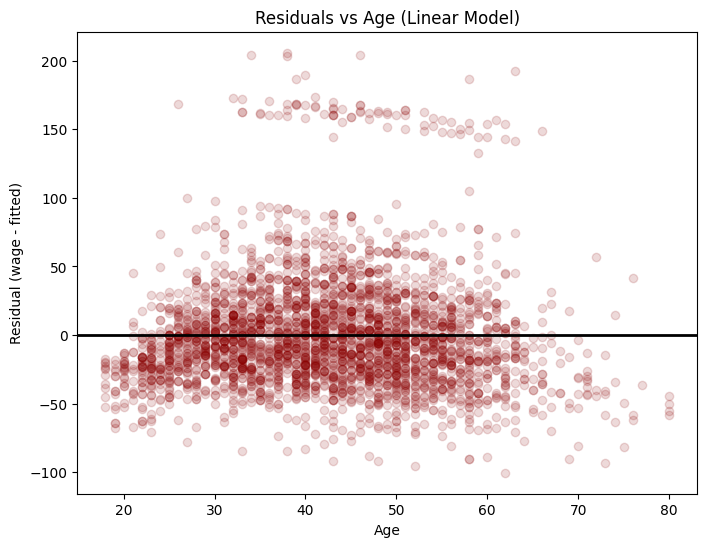

In [196]:
res = y - lm.fittedvalues # just subtracting 

plt.figure(figsize=(8, 6))
plt.scatter(age, res, alpha=0.15, color = 'darkred')
plt.axhline(0, color='black', linewidth=2)
plt.xlabel("Age")
plt.ylabel("Residual (wage - fitted)")
plt.title("Residuals vs Age (Linear Model)")
plt.show()

There is still some structure in the residuals. We want these noisy and not with the structure, particularly in the out years. 

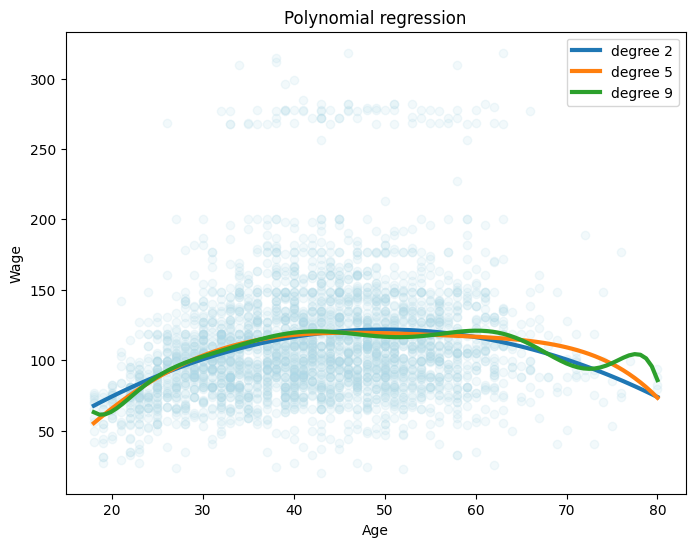

In [197]:
# Polynomial Excursion 

degrees = [2, 5, 9]

plt.figure(figsize=(8, 6))
plt.scatter(age, y, alpha=0.15, color = 'lightblue')

for d in degrees:
    basis = MS([poly('age', degree=d)]).fit(Wage)
    X = sm.add_constant(basis.transform(Wage))
    X_new = sm.add_constant(basis.transform(age_df), has_constant='add')

    model = sm.OLS(y, X).fit()
    
    X_new_aligned = X_new.reindex(columns=X.columns, fill_value=0)
    y_hat = model.predict(X_new_aligned)

    plt.plot(age_grid, y_hat, linewidth=3, label=f"degree {d}")

plt.xlabel("Age")
plt.ylabel("Wage")
plt.title("Polynomial regression")
plt.legend()
plt.show()


One-dimensional spline

wage as a function of age only, considering various smoothness penalties 

<>:15: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:19: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:15: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:19: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
/var/folders/71/c2g21d2j481_zy6d4fw4bt500000gn/T/ipykernel_2751/174504851.py:15: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
  plt.plot(age_grid, yhat, linewidth=3, label=f"$\lambda$={lam:g}")
/var/folders/71/c2g21d2j481_zy6d4fw4bt500000gn/T/ipykernel_2751/174504851.py:19: SyntaxW

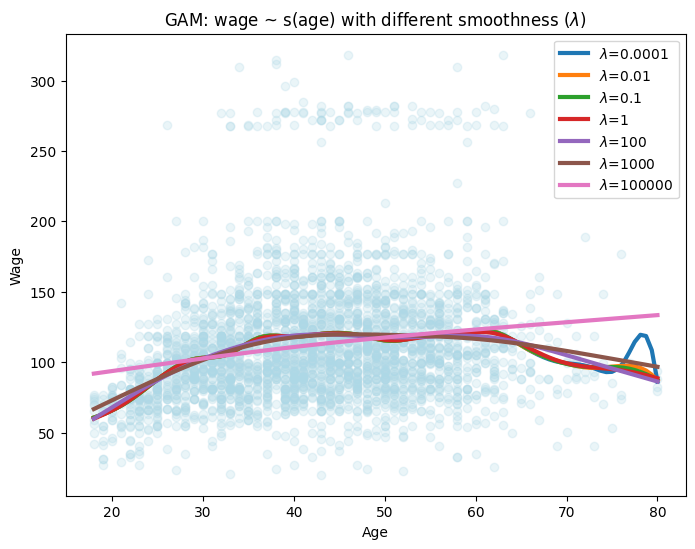

In [ ]:
from pygam import LinearGAM, s, f

X = Wage[['age']].to_numpy()
Xg = age_grid.reshape(-1, 1)

# Pick a few values spanning orders of magnitude
lams = [0.0001, 0.01, 0.1, 1, 100, 1000, 100000]  

plt.figure(figsize=(8, 6))
plt.scatter(Wage['age'], y, alpha=0.25, color = 'lightblue')

for lam in lams:
    gam = LinearGAM(s(0), lam=lam).fit(X, y)
    yhat = gam.predict(Xg)
    plt.plot(age_grid, yhat, linewidth=3, label=f"$\lambda$={lam:g}")

plt.xlabel("Age")
plt.ylabel("Wage")
plt.title("GAM: wage ~ s(age) with different smoothness ($\lambda$)")
plt.legend()
plt.show()


In [199]:
for lam in lams:
    gam = LinearGAM(s(0), lam=lam).fit(X, y)
    print(f"lambda = {lam:g}  ->  effective degrees of freedom = {gam.statistics_['edof']:.2f}")


lambda = 0.0001  ->  effective degrees of freedom = 19.89
lambda = 0.01  ->  effective degrees of freedom = 18.75
lambda = 0.1  ->  effective degrees of freedom = 17.32
lambda = 1  ->  effective degrees of freedom = 14.41
lambda = 100  ->  effective degrees of freedom = 6.75
lambda = 1000  ->  effective degrees of freedom = 4.30
lambda = 100000  ->  effective degrees of freedom = 2.13


In [200]:
lams_grid = np.logspace(-5, 5, 150)
gam_cv = LinearGAM(s(0)).gridsearch(X, y, lam=lams_grid)

print("Selected lambda: ", gam_cv.lam)


  0% (0 of 150) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
  1% (2 of 150) |                        | Elapsed Time: 0:00:00 ETA:   0:00:05
  4% (6 of 150) |                        | Elapsed Time: 0:00:00 ETA:   0:00:02
  8% (12 of 150) |#                      | Elapsed Time: 0:00:00 ETA:   0:00:02
 12% (18 of 150) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:01
 15% (23 of 150) |###                    | Elapsed Time: 0:00:00 ETA:   0:00:01
 19% (29 of 150) |####                   | Elapsed Time: 0:00:00 ETA:   0:00:01
 23% (35 of 150) |#####                  | Elapsed Time: 0:00:00 ETA:   0:00:01
 26% (40 of 150) |######                 | Elapsed Time: 0:00:00 ETA:   0:00:01
 30% (46 of 150) |#######                | Elapsed Time: 0:00:00 ETA:   0:00:01
 34% (52 of 150) |#######                | Elapsed Time: 0:00:00 ETA:   0:00:01
 37% (56 of 150) |########               | Elapsed Time: 0:00:00 ETA:   0:00:01
 40% (61 of 150) |#########             

Selected lambda:  [[np.float64(241.29611832536122)]]


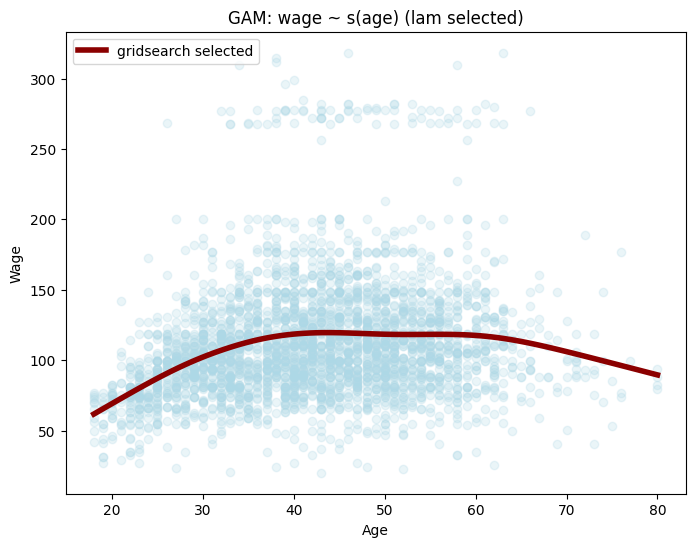

In [201]:
plt.figure(figsize=(8, 6))
plt.scatter(Wage['age'], y, alpha=0.25, color = 'lightblue')
plt.plot(age_grid, gam_cv.predict(Xg), color='darkred', linewidth=4, label="gridsearch selected")
plt.xlabel("Age"); plt.ylabel("Wage")
plt.title("GAM: wage ~ s(age) (lam selected)")
plt.legend()
plt.show()


[[0.6]]


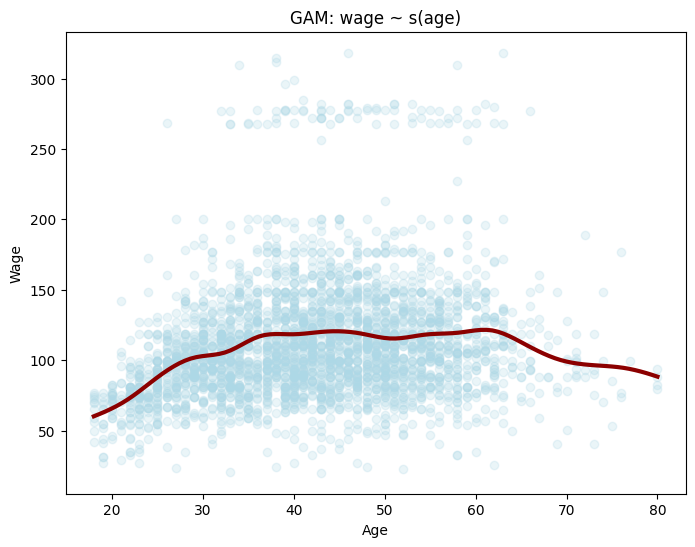

In [202]:
# GAM: wage vs age, default penalty

X_age = Wage[['age']].to_numpy()
gam_age = LinearGAM(s(0)).fit(X_age, y)
print(gam_age.lam)

Xg = age_grid.reshape(-1, 1)
y_hat = gam_age.predict(Xg)

plt.figure(figsize=(8, 6))
plt.scatter(Wage['age'], y, alpha=0.25, color = 'lightblue')
plt.plot(age_grid, y_hat, color='darkred', linewidth=3)
plt.xlabel("Age"); plt.ylabel("Wage")
plt.title("GAM: wage ~ s(age)")
plt.show()


<>:15: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:15: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
/var/folders/71/c2g21d2j481_zy6d4fw4bt500000gn/T/ipykernel_2751/2440400909.py:15: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
  plt.title("GAM (gridsearch $\lambda$): wage ~ s(age)")
  0% (0 of 150) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
  4% (6 of 150) |                        | Elapsed Time: 0:00:00 ETA:   0:00:01
  8% (12 of 150) |#                      | Elapsed Time: 0:00:00 ETA:   0:00:01
 12% (18 of 150) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:01
 15% (23 of 150) |###                    | Elapsed Time: 0:00:00 ETA:   0:00:01
 19% (

Gridsearch-selected lam: [[np.float64(241.29611832536122)]]
Gridsearch edof: 5.688602121257317


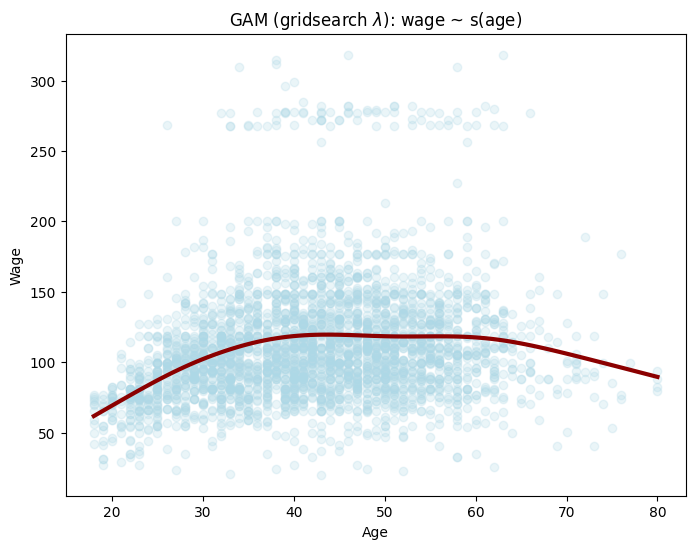

In [203]:
# GAM: wage vs age, gridsearch "optimized" lambda

lams_grid = np.logspace(-5, 5, 150)

gam_age_cv = LinearGAM(s(0)).gridsearch(X_age, y, lam=lams_grid)
yhat_cv = gam_age_cv.predict(Xg)

print("Gridsearch-selected lam:", gam_age_cv.lam)
print("Gridsearch edof:", gam_age_cv.statistics_["edof"])

plt.figure(figsize=(8, 6))
plt.scatter(Wage['age'], y, alpha=0.25, color = 'lightblue')
plt.plot(age_grid, yhat_cv, color='darkred', linewidth=3)
plt.xlabel("Age"); plt.ylabel("Wage")
plt.title("GAM (gridsearch $\lambda$): wage ~ s(age)")
plt.show()

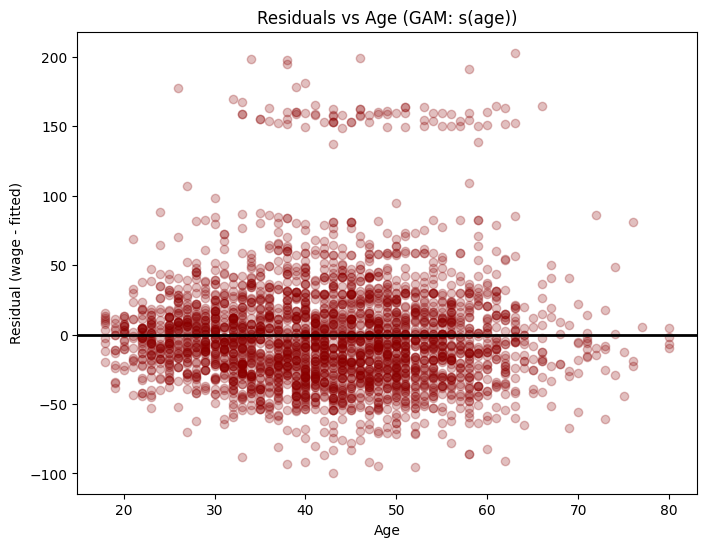

In [204]:
resid_gam = y - gam_age_cv.predict(X_age)

plt.figure(figsize=(8, 6))
plt.scatter(Wage['age'], resid_gam, alpha=0.25, color='darkred')
plt.axhline(0, color='black', linewidth=2)
plt.xlabel("Age"); plt.ylabel("Residual (wage - fitted)")
plt.title("Residuals vs Age (GAM: s(age))")
plt.show()


  0% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
  2% (2 of 100) |                        | Elapsed Time: 0:00:00 ETA:   0:00:03
  6% (6 of 100) |#                       | Elapsed Time: 0:00:00 ETA:   0:00:02
  9% (9 of 100) |##                      | Elapsed Time: 0:00:00 ETA:   0:00:02
 12% (12 of 100) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:02
 16% (16 of 100) |###                    | Elapsed Time: 0:00:00 ETA:   0:00:01
 19% (19 of 100) |####                   | Elapsed Time: 0:00:00 ETA:   0:00:01
 22% (22 of 100) |#####                  | Elapsed Time: 0:00:00 ETA:   0:00:01
 25% (25 of 100) |#####                  | Elapsed Time: 0:00:00 ETA:   0:00:01
 27% (27 of 100) |######                 | Elapsed Time: 0:00:00 ETA:   0:00:01
 30% (30 of 100) |######                 | Elapsed Time: 0:00:00 ETA:   0:00:01
 33% (33 of 100) |#######                | Elapsed Time: 0:00:00 ETA:   0:00:01
 36% (36 of 100) |########              

Selected lam (age+year): [[np.float64(475.0810162102793)], [np.float64(475.0810162102793)]]
edof (age+year): 9.409631082490975


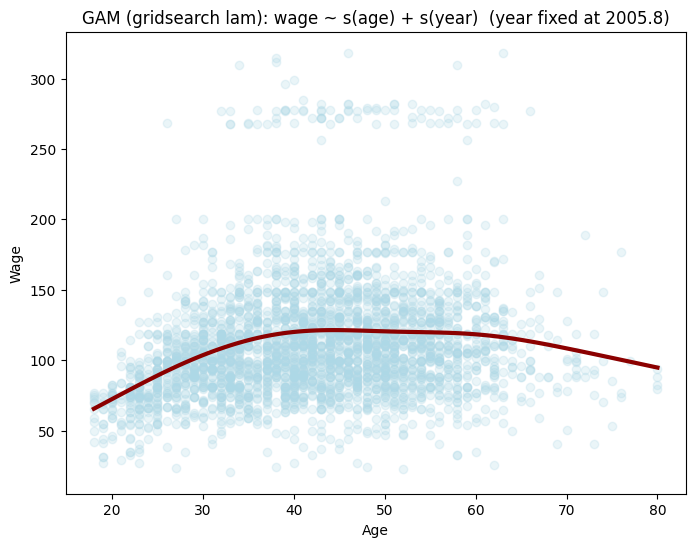

In [205]:
# fit age year 

from pygam import LinearGAM, s

X_ay = Wage[['age', 'year']].to_numpy()
year0 = float(Wage['year'].mean()) #mean year

lams_grid2 = np.logspace(-5, 5, 100)
gam_ay_cv = LinearGAM(s(0) + s(1)).gridsearch(X_ay, y, lam=lams_grid2)
print("Selected lam (age+year):", gam_ay_cv.lam)
print("edof (age+year):", gam_ay_cv.statistics_["edof"])

Xg_ay = np.column_stack([age_grid,np.full_like(age_grid, year0)])

yhat_ay = gam_ay_cv.predict(Xg_ay)

plt.figure(figsize=(8, 6))
plt.scatter(Wage['age'], y, alpha=0.25, color = 'lightblue')
plt.plot(age_grid, yhat_ay, color='darkred', linewidth=3)
plt.xlabel("Age"); plt.ylabel("Wage")
plt.title(f"GAM (gridsearch lam): wage ~ s(age) + s(year)  (year fixed at {year0:.1f})")
plt.show()

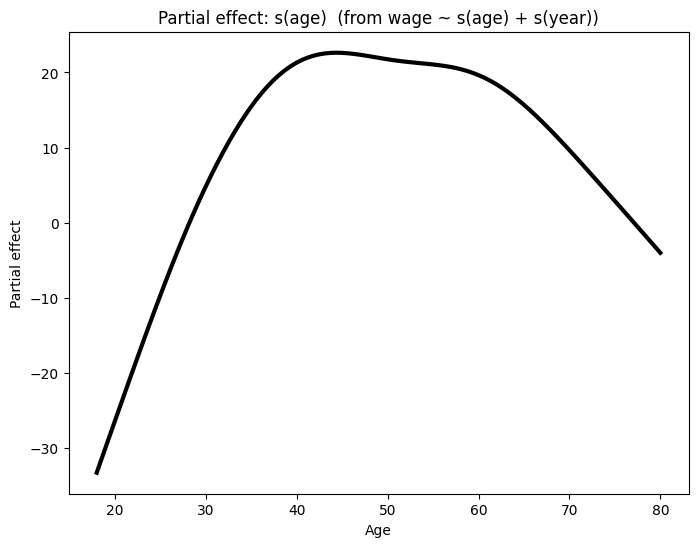

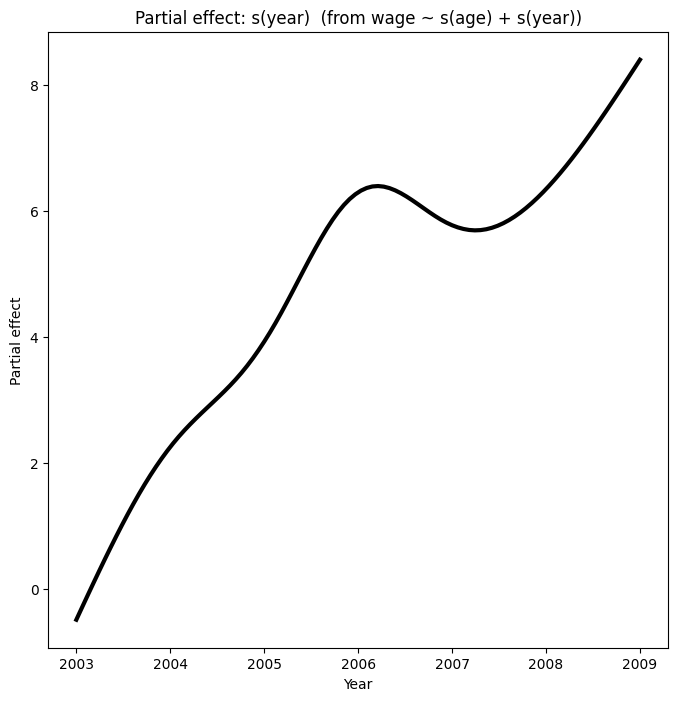

In [206]:
# plot the partial effect of age and year

# Partial effect of age
XX_age = gam_ay_cv.generate_X_grid(term=0)
p_age = gam_ay_cv.partial_dependence(term=0, X=XX_age)

plt.figure(figsize=(8, 6))
plt.plot(XX_age[:, 0], p_age, color='black', linewidth=3)
plt.xlabel("Age"); plt.ylabel("Partial effect")
plt.title("Partial effect: s(age)  (from wage ~ s(age) + s(year))")
plt.show()

# Partial effect of year
XX_year = gam_ay_cv.generate_X_grid(term=1)
p_year = gam_ay_cv.partial_dependence(term=1, X=XX_year)

plt.figure(figsize=(8, 8))
plt.plot(XX_year[:, 1], p_year, color='black', linewidth=3)
plt.xlabel("Year"); plt.ylabel("Partial effect")
plt.title("Partial effect: s(year)  (from wage ~ s(age) + s(year))")
plt.show()


  0% (0 of 150) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
  1% (2 of 150) |                        | Elapsed Time: 0:00:00 ETA:   0:00:03
  4% (6 of 150) |                        | Elapsed Time: 0:00:00 ETA:   0:00:03
  6% (10 of 150) |#                      | Elapsed Time: 0:00:00 ETA:   0:00:03
  9% (14 of 150) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:03
 12% (18 of 150) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:03
 14% (21 of 150) |###                    | Elapsed Time: 0:00:00 ETA:   0:00:02
 16% (25 of 150) |###                    | Elapsed Time: 0:00:00 ETA:   0:00:02
 19% (29 of 150) |####                   | Elapsed Time: 0:00:00 ETA:   0:00:02
 20% (31 of 150) |####                   | Elapsed Time: 0:00:00 ETA:   0:00:02
 22% (33 of 150) |#####                  | Elapsed Time: 0:00:00 ETA:   0:00:02
 23% (35 of 150) |#####                  | Elapsed Time: 0:00:00 ETA:   0:00:02
 25% (38 of 150) |#####                 

Selected lambda (age + year + edu): [[np.float64(22.335377063851233)], [np.float64(22.335377063851233)], [np.float64(22.335377063851233)]]
edof (age + year + edu): 18.599864225798385


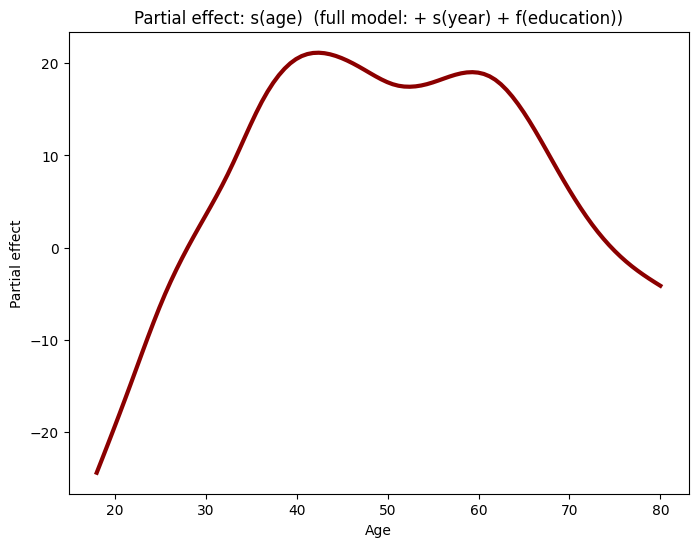

In [207]:
# full model with age + year + education 

edu = Wage['education'].astype('category')
edu_codes = edu.cat.codes.to_numpy()

X_aye = np.column_stack([Wage['age'].to_numpy(),Wage['year'].to_numpy(),edu_codes])

# Same 1D lam grid applied to all terms (keeps it simple for a live demo)
lams_grid3 = np.logspace(-3, 3, 150)
gam_aye_cv = LinearGAM(s(0) + s(1) + f(2)).gridsearch(X_aye, y, lam=lams_grid3)

print("Selected lambda (age + year + edu):", gam_aye_cv.lam)
print("edof (age + year + edu):", gam_aye_cv.statistics_["edof"])

XX_age2 = gam_aye_cv.generate_X_grid(term=0)
p_age2 = gam_aye_cv.partial_dependence(term=0, X=XX_age2)

plt.figure(figsize=(8, 6))
plt.plot(XX_age2[:, 0], p_age2, color='darkred', linewidth=3)
plt.xlabel("Age"); plt.ylabel("Partial effect")
plt.title("Partial effect: s(age)  (full model: + s(year) + f(education))")
plt.show()


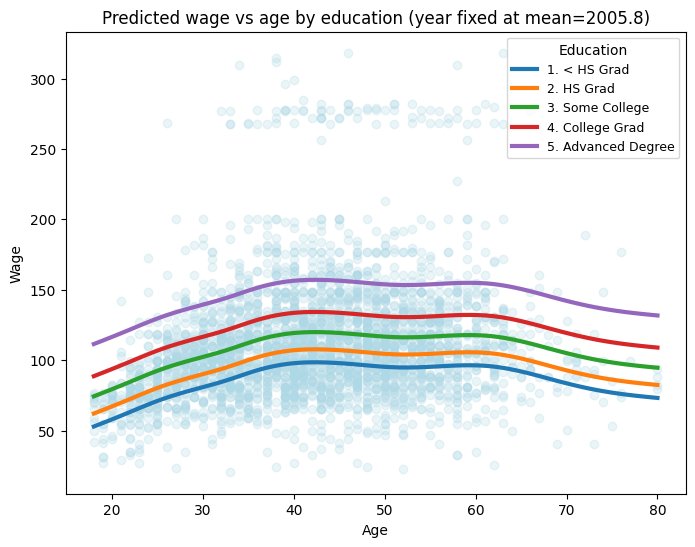

In [208]:
#final plot - wage vs age, fixed mean year, each education category 

year0 = float(Wage['year'].mean())

plt.figure(figsize=(8, 6))
plt.scatter(Wage['age'], y, alpha=0.25, color = 'lightblue')

for code, lvl in enumerate(edu.cat.categories):
    Xg = np.column_stack([age_grid, np.full_like(age_grid, year0), np.full_like(age_grid, code)])
    yhat = gam_aye_cv.predict(Xg)
    plt.plot(age_grid, yhat, linewidth=3, label=str(lvl))

plt.xlabel("Age"); plt.ylabel("Wage")
plt.title(f"Predicted wage vs age by education (year fixed at mean={year0:.1f})")
plt.legend(title="Education", fontsize=9)
plt.show()